In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\Praveen Jha\OneDrive\Desktop\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
# General info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<AxesSubplot:title={'center':'Age distrubition'}, ylabel='Density'>

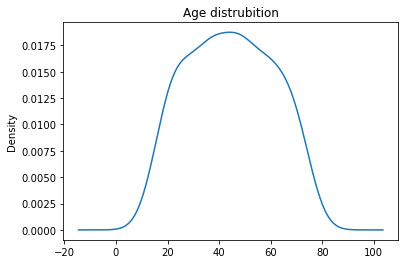

In [4]:
# EDA and visulisations
# AGE
plt.title("Age distrubition")
df['Age'].plot(kind='kde')


In [5]:
df['Age'].mean()

44.315

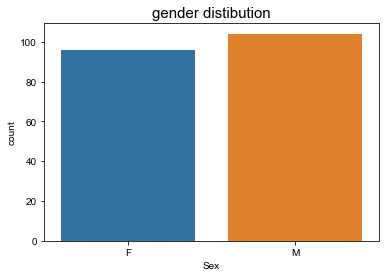

In [6]:
# Gender 
sns.countplot(x=df.Sex)
plt.title("gender distibution",fontsize=15)
sns.set_style("darkgrid")

In [7]:
print("we can see that there is almost an equal distubition of male and female")

we can see that there is almost an equal distubition of male and female


In [8]:
# DRUG

In [9]:
df.value_counts('Drug')

Drug
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
dtype: int64

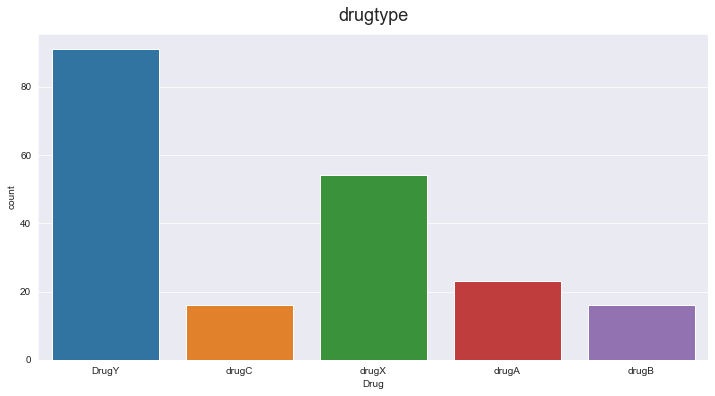

In [10]:
plt.figure(figsize=(12,6))
plt.title('drugtype',fontsize=18,y=1.02)
sns.countplot(x=df.Drug)
plt.show()

In [11]:
print("Drug y is most commonly use drug C is least commonly use ")

Drug y is most commonly use drug C is least commonly use 


<AxesSubplot:xlabel='Drug', ylabel='Age'>

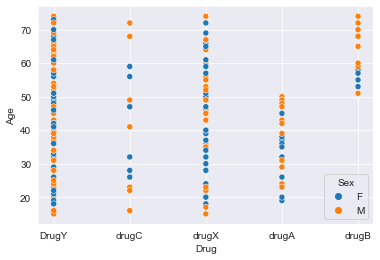

In [12]:
sns.scatterplot(x='Drug',y='Age',hue='Sex',data=df)

In [13]:
print ("we find that drug B used by people over 50 and drug A is used by people under 50")

we find that drug B used by people over 50 and drug A is used by people under 50


<AxesSubplot:title={'center':'BP'}, xlabel='BP', ylabel='count'>

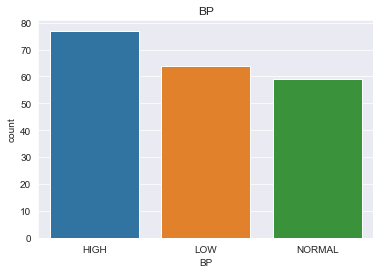

In [14]:
plt.title("BP")
sns.countplot(x=df.BP)

<AxesSubplot:xlabel='Drug', ylabel='count'>

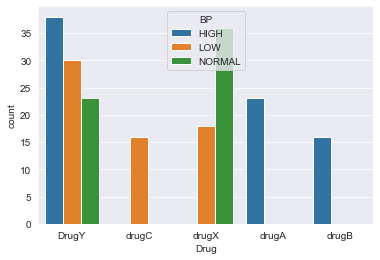

In [15]:
sns.countplot(x='Drug',hue='BP',data=df)

In [16]:
print("Drug B and Drug A is used by with high cholestrol")
print("Drug C is used by low cholestrol")

Drug B and Drug A is used by with high cholestrol
Drug C is used by low cholestrol


<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

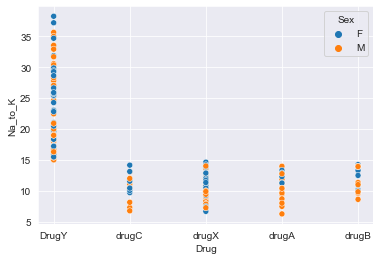

In [17]:
sns.scatterplot(x='Drug', y="Na_to_K", hue='Sex',data=df)

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [19]:
df['Sex'] = lb.fit_transform(df['Sex'].values) 
df['BP'] = lb.fit_transform(df['BP'].values) 
df['Cholesterol'] = lb.fit_transform(df['Cholesterol'].values) 
df['Drug'] = lb.fit_transform(df['Drug'].values)

In [20]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [21]:
df['Drug'] = df['Drug'].fillna(df['Drug'].mean())

# spliting tha data into training and test data set

In [22]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [24]:
len(x_train),len(x_test)

(160, 40)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)
model_score = round(model.score(x_train,y_train) * 100,2)
print("accuracy for logistics regression model is :",model_score)

#DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
dtree_score = round(d_tree.score(x_train,y_train) * 100,2)
print("accuracy for Decision tree classifier model is :",dtree_score)

#RandomForestClassifier
rf_class = RandomForestClassifier()
rf_class.fit(x_train,y_train)
rf_score = round(rf_class.score(x_train,y_train) * 100,2)
print("accuracy for Random forest classifier model is :",rf_score)

accuracy for logistics regression model is : 95.62
accuracy for Decision tree classifier model is : 100.0
accuracy for Random forest classifier model is : 100.0


In [27]:
df1 = pd.DataFrame({'Models':['Logistic','Descion tree','Random forest',],
                          'Accuracy values':[model_score,dtree_score,rf_score]})
df1.sort_values(by='Accuracy values',ascending=False)

,Models,Accuracy values
1,Descion tree,100.00
2,Random forest,100.00
0,Logistic,95.62


Text(0.5, 1.0, 'Bar plot for comapring score from diffrent models')

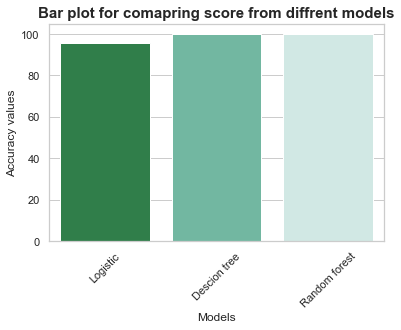

In [28]:
sns.set_theme(style='whitegrid')
sns.barplot(x='Models',y='Accuracy values',data=df1,palette='BuGn_r');
plt.xticks(rotation=45)
plt.title('Bar plot for comapring score from diffrent models',weight='bold',size=15)

# Ml_prediction

In [29]:
final_prediction = d_tree.predict(x_test)
final_prediction

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [30]:
final_prediction = rf_class.predict(x_test)
final_prediction

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 4, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [31]:
final_prediction = model.predict(x_test)
final_prediction

array([4, 1, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 0, 0, 3, 0, 0, 1, 0, 4, 1, 0, 1])

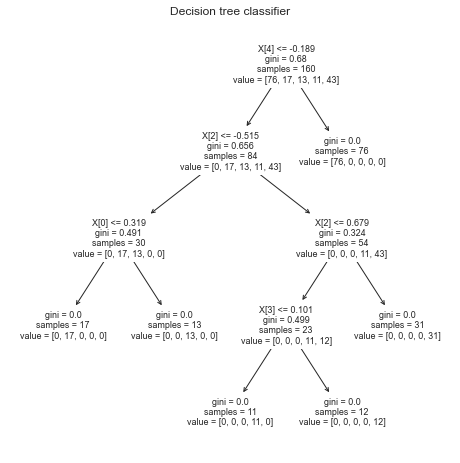

In [34]:
from sklearn import tree
plt.figure(figsize=[8, 8])
tree.plot_tree(d_tree)
plt.title("Decision tree classifier")
plt.show()